In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

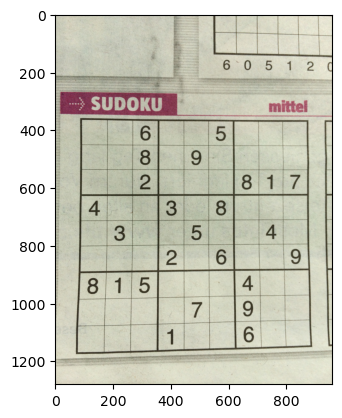

In [74]:
img=cv2.imread("image1004.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

In [18]:
img.shape

(1280, 960, 3)

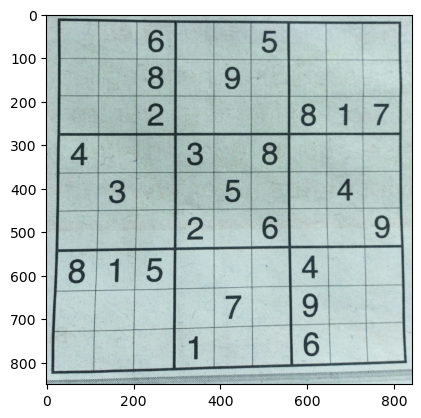

In [75]:
img=img[350:1200,60:900]
plt.imshow(img)

In [76]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)


In [77]:
proc=cv2.GaussianBlur(gray,(9,9),0)
proc=cv2.adaptiveThreshold(proc,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

In [78]:
proc=cv2.bitwise_not(proc,proc)
kernel=np.array([[0., 1., 0.],[1., 1., 1.],[0.,1.,0.]],np.uint8)
proc=cv2.dilate(proc,kernel)

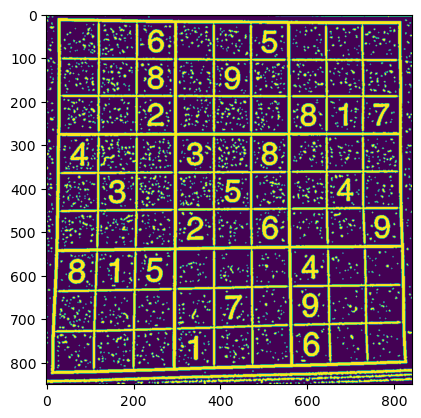

In [36]:
plt.imshow(proc)

In [79]:
ret, thresh = cv2.threshold(proc, 127, 255, 0)
#contours,_ = cv2.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

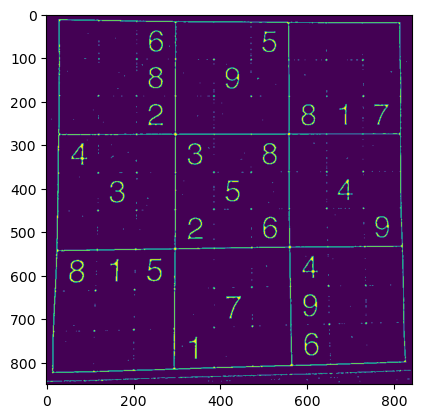

In [59]:
plt.imshow(cv2.drawContours(proc, contours[4], 0, (0,255,0), 3))

In [65]:
[polygon[tl][0],polygon[tr][0],polygon[br][0],polygon[bl][0]]

[array([27,  9], dtype=int32), array([ 11, 826], dtype=int32), array([827, 802], dtype=int32), array([815,  17], dtype=int32)]


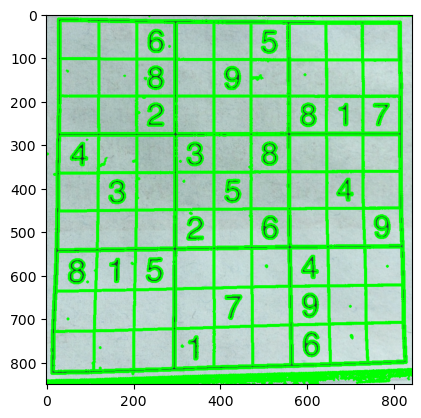

In [98]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(img, 13, 20, 20)
edged = cv2.Canny(bfilter, 30, 180)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
newimg = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
plt.imshow(newimg)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


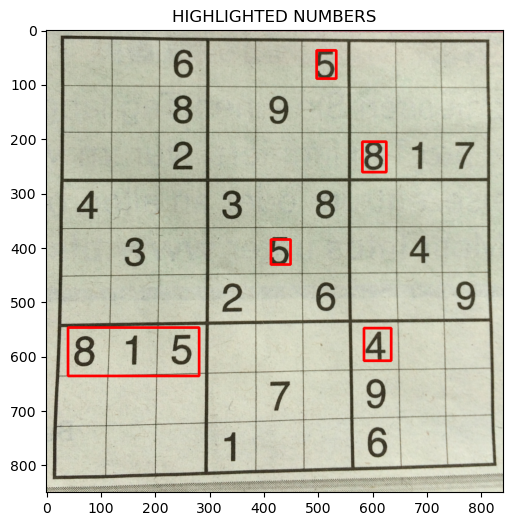

In [102]:
'''import easyocr

reader = easyocr.Reader(['en'])
result = reader.readtext(gray)
'''
for detection in result:
    box = detection[0]
    text = detection[1]
    x1, y1 = box[0][0], box[0][1]
    x2, y2 = box[2][0], box[2][1]
    cv2.rectangle(gray, (x1, y1), (x2, y2), (0, 0, 255), 3)

num = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(num)
plt.show()